In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import OrderedDict

%matplotlib inline

from sys import argv
script, pileup= argv



In [2]:
###read in file
pileup = "Fragaria_x_ananassa-Winter_Dawn_vs_fvesca_v1.1_pseudo.fna.LG1_50K.pileup"
putable = pd.read_table(pileup, sep="\t",header=None)
# putable = putable.head(5000)

In [3]:
###skip lines containing *,+,-,<,>, or that have less than 10 reads
skips = ['\*','\+','\-','\<','\>']
putable= putable[putable[4].str.contains('|'.join(skips)) == False]
putable = putable[putable[4].str.len() >= 10]


In [4]:
#replace $ or ^ with empty string
putable[4] = putable[4].str.replace(r'\^.|\$','', case=None, flags=0)

In [6]:
###GO through table line by line, initaite some counters:
SNPs = pd.DataFrame()
for index, row in putable.iterrows():
    match = 0                                              ###### may not need this after dev.
    bases={"A":0,"C":0,"G":0,"T":0} # save counts in dictionary
    for i, char in enumerate(row[5]):
        if ord(char)-33 >= 30:  
            if re.match(",|\.", row[4][i]):               ######may not need this after dev.
                match += 1
            elif re.match("A", row[4][i] ,re.IGNORECASE):  #count number of mismatches pertaining to each base
                bases["A"] += 1
            elif re.match("T", row[4][i] ,re.IGNORECASE):
                bases["T"] += 1
            elif re.match("C",row[4][i] ,re.IGNORECASE):
                bases["C"] += 1
            elif re.match("G", row[4][i] ,re.IGNORECASE):
                bases["G"] += 1
            else:
                print("ERROR-unknown character in pileup",row[1],row[4][i])
    
    for key,value in bases.items():                        #check that number of mismatches per base is >=3, calc. freq
        if value >= 3:
            total= len(row[4])
            frequency = (float(value)/float(total))
            blah = pd.DataFrame(OrderedDict({"chromosome":[row[0]],"position":[row[1]],"ref_base":[row[2]],"SNP_base":[key],"frequency":[frequency]}), index=[1])
            SNPs = SNPs.append(blah,ignore_index=True)
SNPs=SNPs[['chromosome','position','ref_base','SNP_base','frequency']]
        

In [7]:
#write SNPS to file
SNPs.to_csv("SNPs.txt", "\t")

<Figure size 432x288 with 0 Axes>

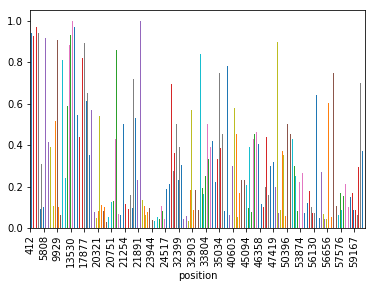

In [9]:
#Plot Figure and save as png
plt.figure();
ax = SNPs.plot(x = 'position',y ='frequency',legend=None, kind ='bar')
xticks= list(range(1,len(SNPs),100))
ax.set_xticks(xticks)
ax.set_xticklabels(SNPs.loc[xticks, 'position'])
plt.savefig("SNPs.png",dpi=300)
plt.show()
